# Assignment 6

<i>I didn't want to copy the example in this lesson in order to write an article. I felt it was better for me to use different data to show my own work and bring my own conclusions to the table. Therefore, instead of using the supplied data in the lesson, I decided to use more up to date information from www.fueleconomy.gov with different variables for the regression plot. This data includes vehicle mpg information from the mid 1980's to 2022 vehicles.

Several factors contribute to the fuel economy of a vehicle. Many of these factors include horsepower, weight and engine size and displacement. These are only some of the factors that play a part in determining fuel efficiency in a vehicle. A large percentage of the population may be able to tell you that a heavier vehicle will have lower fuel economy than a smaller vehicle or an 8-cylinder engine may also have less fuel efficiency than a 6-cylinder engine. But what if I were to ask which fuel type yields higher miles per gallon (MPG) or which car manufacturer has a more fuel efficient line-up of vehicles? What transmission design provides the best fuel efficency and how has the focus on designing better fuel economic cars changed over the years? These are other questions that I will attempt to answer in my work below.

I will begin by importing the necessary libraries and the raw csv data that I saved on my computer. The raw file from the government website included several other columns that dealt with emmissions and other fillers. I deleted those columns prior to saving the csv file in order to reduce the time needed for cleaning the data in Jupyter.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [233]:
address = 'C:\\Users\\Charbel\\Desktop\\Udemy\\2021 Data Science - MachineLearning Project Deployment Mastery\\Assignment 6\\vehicles-mpg.csv'

data = pd.read_csv(address)

data.head()

,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,4.0,2.0,Rear-Wheel Drive,Regular,NaN,19,25
1,1985,Ferrari,Testarossa,Manual 5-spd,Two Seaters,12.0,4.9,Rear-Wheel Drive,Regular,NaN,9,14
2,1985,Dodge,Charger,Manual 5-spd,Subcompact Cars,4.0,2.2,Front-Wheel Drive,Regular,NaN,23,33
3,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,8.0,5.2,Rear-Wheel Drive,Regular,NaN,10,12
4,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,NaN,17,23


In [234]:
data.drop(data.loc[data['Fuel']=='CNG'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Electricity'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Gasoline or natural gas'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Gasoline or propane'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Premium Gas or Electricity'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Premium and Electricity'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Regular Gas and Electricity'].index, inplace=True)
data.drop(data.loc[data['Fuel']=='Regular Gas or Electricity'].index, inplace=True)


By grouping the data by fuel type, I can see all of the different fuel types that are included in the data. Because the focus of the study is on fuel economy, I reduced the data to include only the standard fuel types. More specifically this study focusses on Gasoline, Diesel and Flex Fuel vehicles. This reduced the number of fuel types from 14 to 6. 

In addition to the reduction in the number of fuel types, the values for fuel type are Nominal and not able to be ranked. Therefore, it seems feasible and relevant to rank order the fuel type by the average + standard deviationn of the city MPG of each fuel type. This allows for a better look into how the trend influences the output during regression. This same method was used for all categorical data, such as Make, Class, Transmission, and Drivetrain. Because there are only 2 values in Start-Stop, it isn't necessary to rank order the categories.

In [235]:
f_type = data.groupby('Fuel').mean()+data.groupby('Fuel').std()
f_type.sort_values('City MPG', inplace = True)

fuel = list(f_type.index)

fuel_dict = {}
for i in range(len(fuel)):
  fuel_dict[fuel[i]] = i
    
print(fuel_dict)

data['Fuel'] = data['Fuel'].replace(fuel_dict)
data.head()

{'Midgrade': 0, 'Gasoline or E85': 1, 'Premium or E85': 2, 'Premium': 3, 'Regular': 4, 'Diesel': 5}


,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,4.0,2.0,Rear-Wheel Drive,4,NaN,19,25
1,1985,Ferrari,Testarossa,Manual 5-spd,Two Seaters,12.0,4.9,Rear-Wheel Drive,4,NaN,9,14
2,1985,Dodge,Charger,Manual 5-spd,Subcompact Cars,4.0,2.2,Front-Wheel Drive,4,NaN,23,33
3,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,8.0,5.2,Rear-Wheel Drive,4,NaN,10,12
4,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,4.0,2.2,4-Wheel or All-Wheel Drive,3,NaN,17,23


My next step was to replace the text names in each category with numerical values. I avoided using dummy variables in this case because there would be a significantly large number of variables. For example, there are still 131 makes of vehicles left in the data.

In [236]:
make = data.groupby('Make').mean()+data.groupby('Make').std()
make.sort_values('City MPG', inplace = True)
make = list(make.index)

make_dict = {}
for i in range(len(make)):
  make_dict[make[i]] = i
    
print(make_dict)

data['Make'] = data['Make'].replace(make_dict)
data.head()

{'Vector': 0, 'Bugatti': 1, 'Laforza Automobile Inc': 2, 'Maybach': 3, 'Koenigsegg': 4, 'Ruf Automobile Gmbh': 5, 'Tecstar, LP': 6, 'Texas Coach Company': 7, 'Pagani': 8, 'Saleen Performance': 9, 'Rolls-Royce': 10, 'SRT': 11, 'Lamborghini': 12, 'VPG': 13, 'CCC Engineering': 14, 'Kenyon Corporation Of America': 15, 'PAS, Inc': 16, 'Bentley': 17, 'Spyker': 18, 'Saleen': 19, 'Ferrari': 20, 'PAS Inc - GMC': 21, 'Federal Coach': 22, 'Hummer': 23, 'Mobility Ventures LLC': 24, 'BMW Alpina': 25, 'Roush Performance': 26, 'Aston Martin': 27, 'Bitter Gmbh and Co. Kg': 28, 'Dabryan Coach Builders Inc': 29, 'J.K. Motors': 30, 'TVR Engineering Ltd': 31, 'Morgan': 32, 'Wallace Environmental': 33, 'Autokraft Limited': 34, 'Avanti Motor Corporation': 35, 'Import Trade Services': 36, 'CX Automotive': 37, 'Maserati': 38, 'McLaren Automotive': 39, 'RUF Automobile': 40, 'Sterling': 41, 'Evans Automobiles': 42, 'Bill Dovell Motor Car Company': 43, 'Merkur': 44, 'GMC': 45, 'AM General': 46, 'American Motors 

,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,80,Spider Veloce 2000,Manual 5-spd,Two Seaters,4.0,2.0,Rear-Wheel Drive,4,NaN,19,25
1,1985,20,Testarossa,Manual 5-spd,Two Seaters,12.0,4.9,Rear-Wheel Drive,4,NaN,9,14
2,1985,57,Charger,Manual 5-spd,Subcompact Cars,4.0,2.2,Front-Wheel Drive,4,NaN,23,33
3,1985,57,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,8.0,5.2,Rear-Wheel Drive,4,NaN,10,12
4,1993,87,Legacy AWD Turbo,Manual 5-spd,Compact Cars,4.0,2.2,4-Wheel or All-Wheel Drive,3,NaN,17,23


In [237]:
tran = data.groupby('Transmission').mean()+data.groupby('Transmission').std()
tran.sort_values('City MPG', inplace = True)
tran = list(tran.index)

tran_dict = {}
for i in range(len(tran)):
  tran_dict[tran[i]] = i
    
print(tran_dict)

data['Transmission'] = data['Transmission'].replace(tran_dict)
data.head()

{'Automatic (A1)': 0, 'Automatic (L4)': 1, 'Manual 3-spd': 2, 'Automatic (L3)': 3, 'Automatic 5-spd': 4, 'Automatic 4-spd': 5, 'Automatic 10-spd': 6, 'Automatic 7-spd': 7, 'Automatic 8-spd': 8, 'Manual 7-spd': 9, 'Automatic (S5)': 10, 'Automatic (S4)': 11, 'Automatic 6-spd': 12, 'Automatic (S10)': 13, 'Automatic (AM-S9)': 14, 'Automatic (S7)': 15, 'Automatic (AM-S8)': 16, 'Automatic (S9)': 17, 'Automatic 3-spd': 18, 'Automatic 9-spd': 19, 'Manual 4-spd': 20, 'Automatic (S8)': 21, 'Automatic (S6)': 22, 'Manual 6-spd': 23, 'Automatic (AM-S7)': 24, 'Automatic (AM7)': 25, 'Manual 5-spd': 26, 'Automatic (AM8)': 27, 'Manual 4-spd Doubled': 28, 'Automatic (AV-S8)': 29, 'Automatic (AV-S7)': 30, 'Automatic (AV-S10)': 31, 'Automatic (AM-S10)': 32, 'Automatic (AV-S1)': 33, 'Automatic (AM5)': 34, 'Automatic (AV-S6)': 35, 'Automatic (variable gear ratios)': 36, 'Automatic (AM-S6)': 37, 'Automatic (AM6)': 38}


,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,80,Spider Veloce 2000,26.0,Two Seaters,4.0,2.0,Rear-Wheel Drive,4,NaN,19,25
1,1985,20,Testarossa,26.0,Two Seaters,12.0,4.9,Rear-Wheel Drive,4,NaN,9,14
2,1985,57,Charger,26.0,Subcompact Cars,4.0,2.2,Front-Wheel Drive,4,NaN,23,33
3,1985,57,B150/B250 Wagon 2WD,18.0,Vans,8.0,5.2,Rear-Wheel Drive,4,NaN,10,12
4,1993,87,Legacy AWD Turbo,26.0,Compact Cars,4.0,2.2,4-Wheel or All-Wheel Drive,3,NaN,17,23


In [238]:
data['Start-Stop'] = data['Start-Stop'].fillna(0)
data['Start-Stop'] = data['Start-Stop'].replace('Y', 1)
data['Start-Stop'] = data['Start-Stop'].replace('N', 0)
data.head()

,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,80,Spider Veloce 2000,26.0,Two Seaters,4.0,2.0,Rear-Wheel Drive,4,0,19,25
1,1985,20,Testarossa,26.0,Two Seaters,12.0,4.9,Rear-Wheel Drive,4,0,9,14
2,1985,57,Charger,26.0,Subcompact Cars,4.0,2.2,Front-Wheel Drive,4,0,23,33
3,1985,57,B150/B250 Wagon 2WD,18.0,Vans,8.0,5.2,Rear-Wheel Drive,4,0,10,12
4,1993,87,Legacy AWD Turbo,26.0,Compact Cars,4.0,2.2,4-Wheel or All-Wheel Drive,3,0,17,23


In [239]:
class_list = data.groupby('Class').mean()+data.groupby('Class').std()
class_list.sort_values('City MPG', inplace = True)
class_list = list(class_list.index)

class_dict = {}
for i in range(len(class_list)):
  class_dict[class_list[i]] = i
    
print(class_dict)

data['Class'] = data['Class'].replace(class_dict)
data.head()

{'Standard Pickup Trucks/2wd': 0, 'Vans, Passenger Type': 1, 'Vans, Cargo Type': 2, 'Vans Passenger': 3, 'Vans': 4, 'Standard Pickup Trucks': 5, 'Special Purpose Vehicles/4wd': 6, 'Standard Pickup Trucks 4WD': 7, 'Standard Pickup Trucks 2WD': 8, 'Special Purpose Vehicle 4WD': 9, 'Special Purpose Vehicles': 10, 'Sport Utility Vehicle - 4WD': 11, 'Small Pickup Trucks 4WD': 12, 'Minivan - 2WD': 13, 'Standard Sport Utility Vehicle 2WD': 14, 'Midsize-Large Station Wagons': 15, 'Special Purpose Vehicle 2WD': 16, 'Standard Sport Utility Vehicle 4WD': 17, 'Minivan - 4WD': 18, 'Sport Utility Vehicle - 2WD': 19, 'Special Purpose Vehicles/2wd': 20, 'Small Pickup Trucks 2WD': 21, 'Small Pickup Trucks': 22, 'Midsize Station Wagons': 23, 'Large Cars': 24, 'Two Seaters': 25, 'Minicompact Cars': 26, 'Small Sport Utility Vehicle 4WD': 27, 'Subcompact Cars': 28, 'Midsize Cars': 29, 'Small Sport Utility Vehicle 2WD': 30, 'Compact Cars': 31, 'Small Station Wagons': 32, 'Special Purpose Vehicle': 33}


,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,80,Spider Veloce 2000,26.0,25,4.0,2.0,Rear-Wheel Drive,4,0,19,25
1,1985,20,Testarossa,26.0,25,12.0,4.9,Rear-Wheel Drive,4,0,9,14
2,1985,57,Charger,26.0,28,4.0,2.2,Front-Wheel Drive,4,0,23,33
3,1985,57,B150/B250 Wagon 2WD,18.0,4,8.0,5.2,Rear-Wheel Drive,4,0,10,12
4,1993,87,Legacy AWD Turbo,26.0,31,4.0,2.2,4-Wheel or All-Wheel Drive,3,0,17,23


In [240]:
drive = data.groupby('Drivetrain').mean()+data.groupby('Drivetrain').std()
drive.sort_values('City MPG', inplace = True)
drive = list(drive.index)

drive_dict = {}
for i in range(len(drive)):
  drive_dict[drive[i]] = i
    
print(drive_dict)

data['Drivetrain'] = data['Drivetrain'].replace(drive_dict)
data.head()

{'4-Wheel or All-Wheel Drive': 0, 'Rear-Wheel Drive': 1, '2-Wheel Drive': 2, '4-Wheel Drive': 3, 'Part-time 4-Wheel Drive': 4, 'All-Wheel Drive': 5, 'Front-Wheel Drive': 6}


,Model Year,Make,Model,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
0,1985,80,Spider Veloce 2000,26.0,25,4.0,2.0,1.0,4,0,19,25
1,1985,20,Testarossa,26.0,25,12.0,4.9,1.0,4,0,9,14
2,1985,57,Charger,26.0,28,4.0,2.2,6.0,4,0,23,33
3,1985,57,B150/B250 Wagon 2WD,18.0,4,8.0,5.2,1.0,4,0,10,12
4,1993,87,Legacy AWD Turbo,26.0,31,4.0,2.2,0.0,3,0,17,23


In [241]:
data.dtypes

Model Year        int64
Make              int64
Model            object
Transmission    float64
Class             int64
Cylinders       float64
Displacement    float64
Drivetrain      float64
Fuel              int64
Start-Stop        int64
City MPG          int64
Highway MPG       int64
dtype: object

In [242]:
data['Start-Stop'] = data['Start-Stop'].astype('float64')

At this point the data cleaning is complete. The "Model" column will be deleted when evaluating the regression model. It is too broad of a scope for this study. However, it could be revisited later on when comparing the MPG of the models for each car manufacturer.

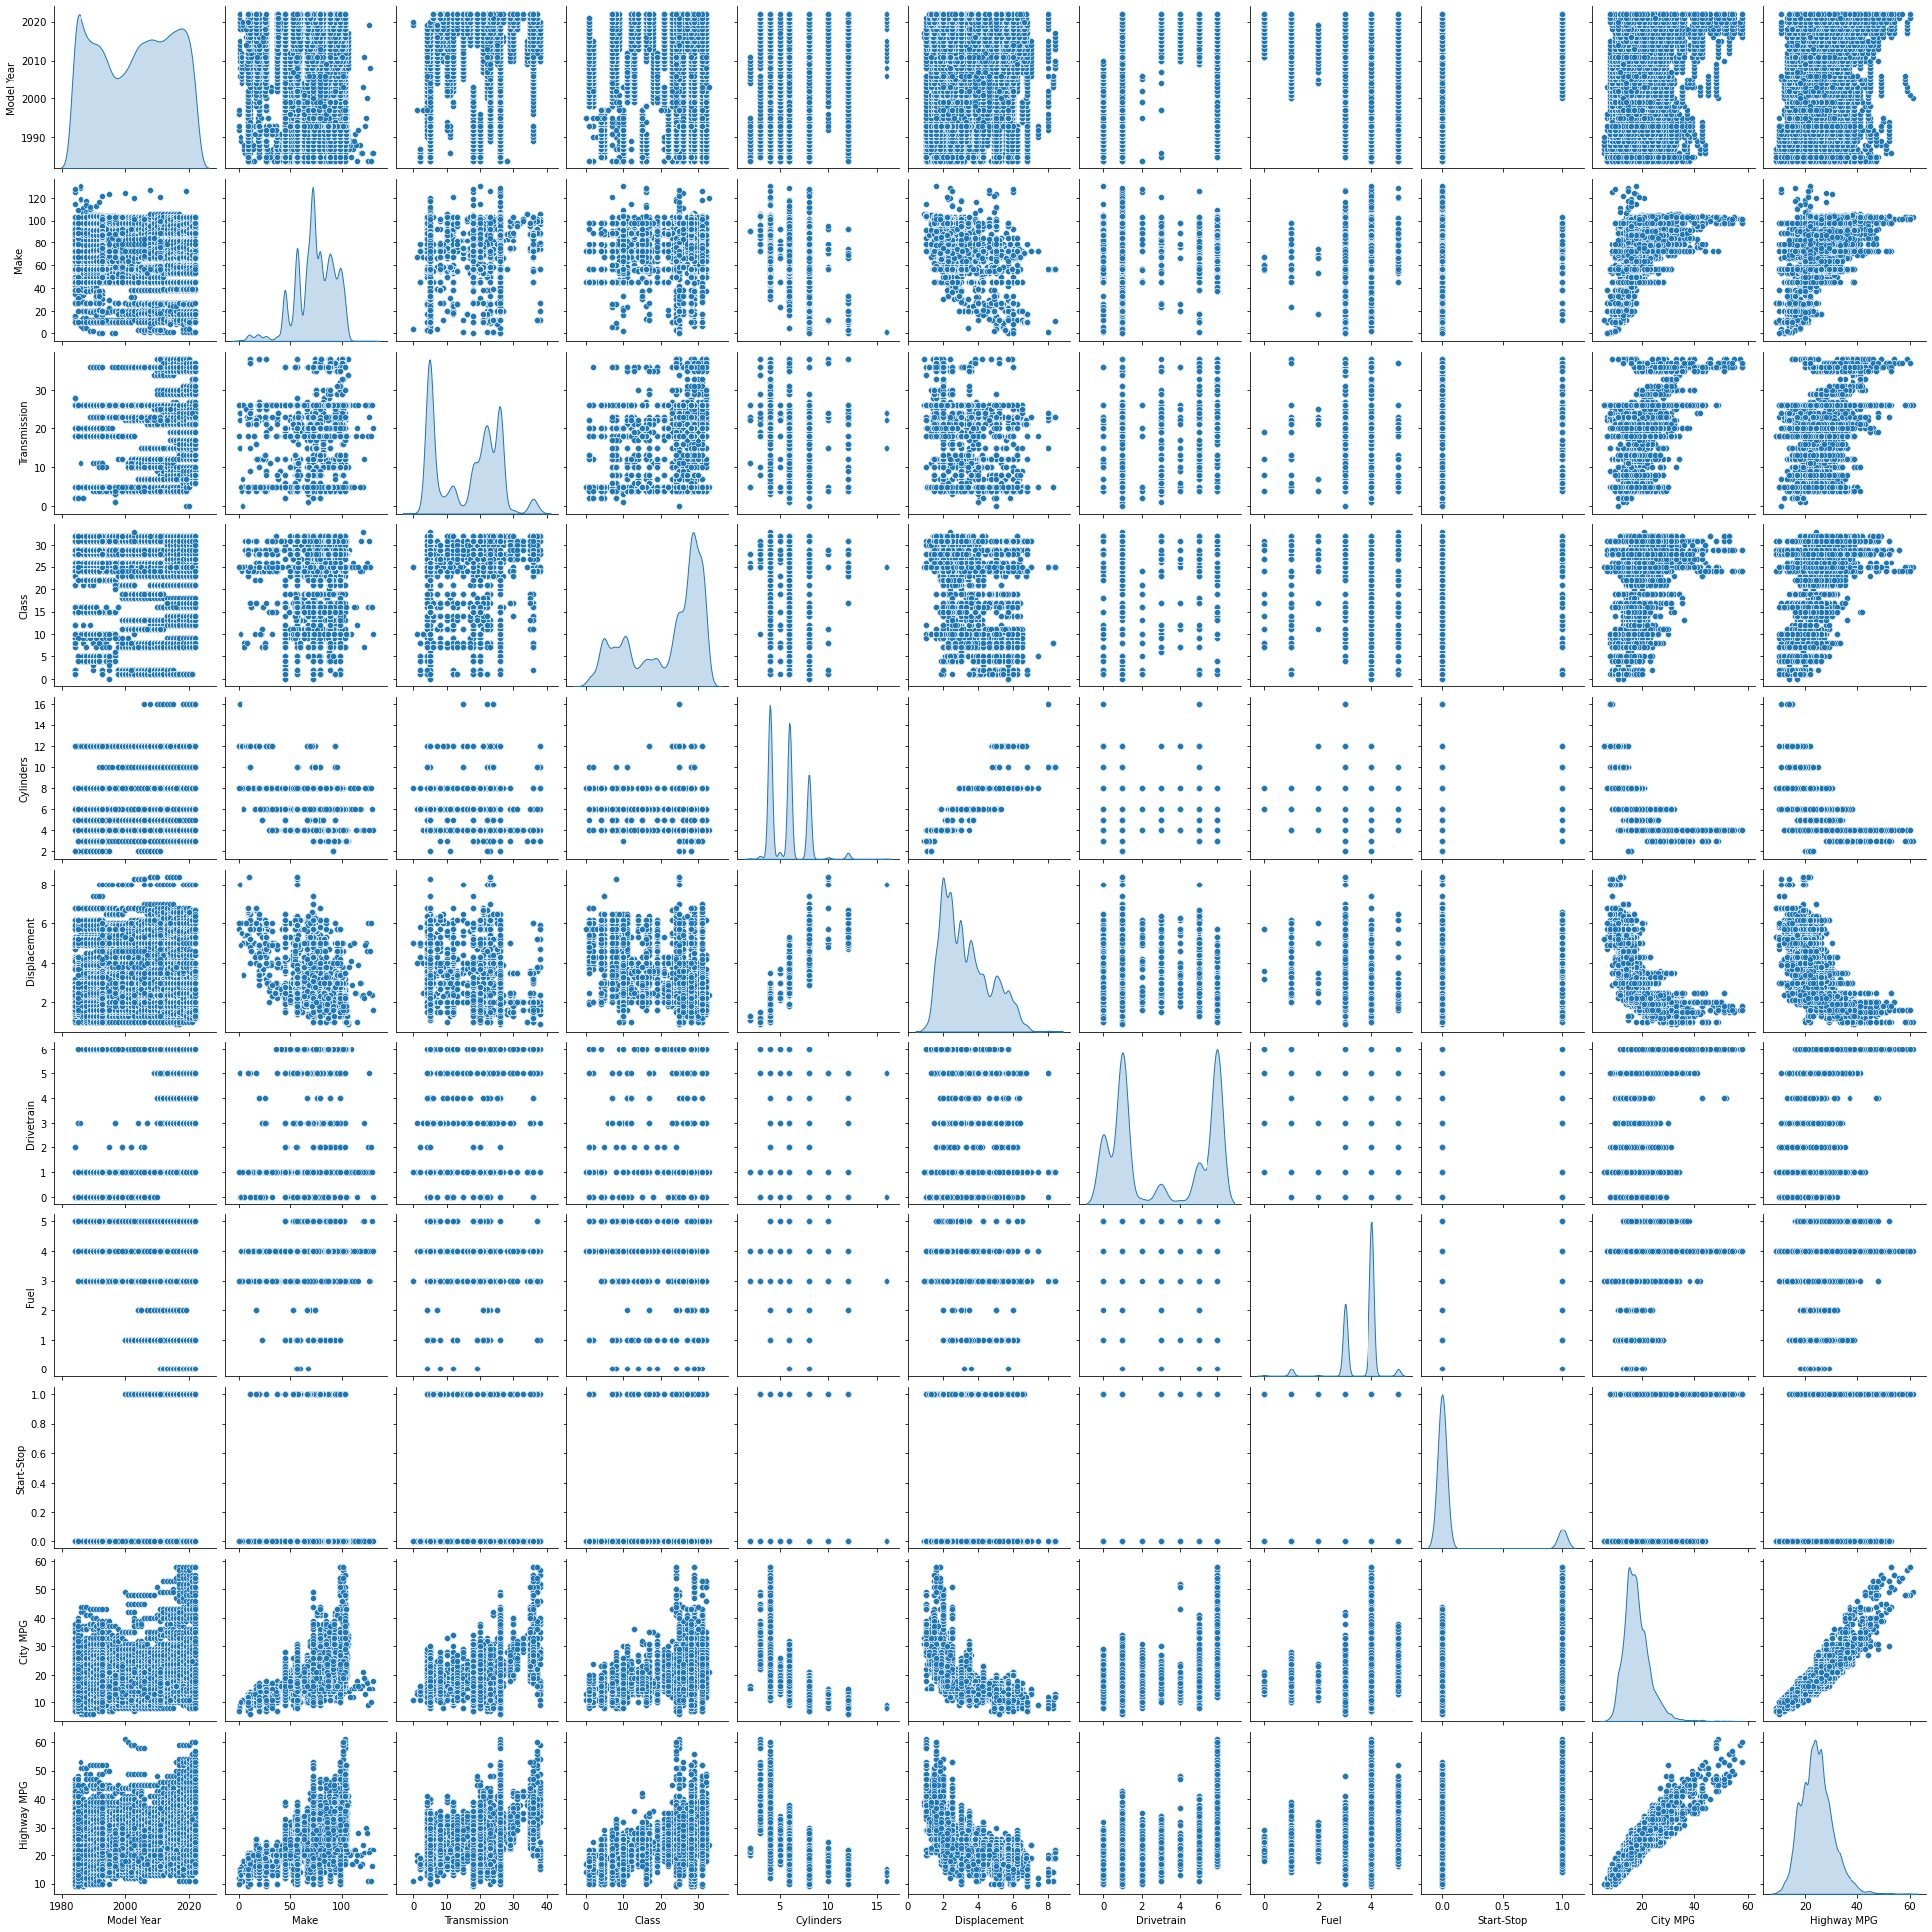

In [243]:
sb.pairplot(data, diag_kind = 'kde')

From the pairplot, the most interesting information can be found in the last 2 rows / columns. The 2 most obvious trends that stand out the most are the relationships between fuel economy and the number of cylinders and the engine displacement. In other words, less cylinders and smaller displacement result in better fuel economy. 

Another interesting inference that can be made is that, in some cases, Start-Stop Technology does not make a significant improvement on the low end. Meaning that the City MPG still has a low end of the distribution near 10 MPG. However, the high end of the distribution is near 60 MPG as compared to without Start-Stop which has a high end near 50 MPG. A further study can be conducted on this in another article to determine the true effectiveness of Start-Stop

One final inference from the pairplot, before moving on to regression, is that more fuel efficient vehicles were made after around 2010. There may not have been a significant mean shift, which can be confirmed with further statistical analysis, but the distribution does appear to skew more towards higher values. This may be due to further regulations and more lightweight materials that can influence the fuel efficency. This will be the subject of another article to detail the improvements to fuel efficiency over time.

## Linear Regression Model

Since there is a somewhat good relationship between highway and city MPG, I'm deciding to only focus on the city MPG as my output variable, with the understanding that the highway fuel economy will be effected similarly.

First I will define my independent variables 'x' to exclude the Model, and the city and highway MPG. The city MPG will be my dependent variable 'y', which will be the city MPG. 

In [244]:
x = data.drop(['Model', 'City MPG', 'Highway MPG'], axis = 1)

y = data[['City MPG']]


An initial run of the regression model resulted in a ValueError because of some NaN values that were somehow burried in the input variable data. Therefore, I replaced the NaN values with the respective medians from each variable.

In [245]:
x=x.fillna(x.median())
np.all(np.isnan(x))

False

In [246]:
np.all(np.isfinite(x))

True

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 4 )

In [248]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [249]:
regression_model.coef_

array([[ 0.05587278,  0.03860907,  0.08378819,  0.06962608, -0.72067758,
        -0.81892031,  0.27616055,  0.77424953,  2.24869623]])

In [250]:
for indx, col_name in enumerate(x_train.columns):
    print("Coefficient of {} is {}".format(col_name, regression_model.coef_[0][indx]))

Coefficient of Model Year is 0.055872779144651066
Coefficient of Make is 0.038609073642610625
Coefficient of Transmission is 0.08378819038338604
Coefficient of Class is 0.06962607959815119
Coefficient of Cylinders is -0.7206775830445521
Coefficient of Displacement is -0.8189203053454095
Coefficient of Drivetrain is 0.2761605457028319
Coefficient of Fuel is 0.7742495296825386
Coefficient of Start-Stop is 2.248696234613581


In [251]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -96.60057485187266


The regression model shows that the Start-Stop of the vehicle can have a significant influence on the City MPG of the vehicle. This is as expected since Start-Stop technology is focused on addressing low fuel economy in idle test conditions. Other top factors include the size of the engine(Number of Cylinders and Displacement) and fuel type.

In [252]:
regression_model.score(x_train, y_train)

0.674519540940575

In [253]:
regression_model.score(x_test, y_test)

0.6843223183850786

In [255]:
comparison = pd.DataFrame(regression_model.predict(x_test))
comparison['Actual'] = list(y_test['City MPG'])
comparison.rename(columns = {0: 'Predicted'}, inplace = True)

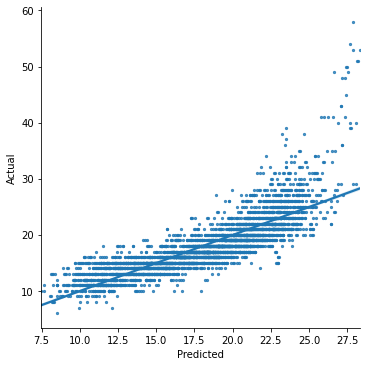

In [259]:
sb.lmplot(x = 'Predicted', y = 'Actual', data = comparison, scatter_kws={"s": 5})

The regression model shows only a 68% accuracy. This seems like a low level of accuracy. However, many of the input variables are categorical with a distribution of the output for each category that overlaps those of other categories. Horizontal lines in the plot above are due to an influence from categorical data. In general, however, a trend can be observed. 

In [260]:
data.corr()

,Model Year,Make,Transmission,Class,Cylinders,Displacement,Drivetrain,Fuel,Start-Stop,City MPG,Highway MPG
Model Year,1.000000,0.025153,0.136325,0.181516,0.058209,0.011845,0.181314,-0.357775,0.463917,0.213562,0.288834
Make,0.025153,1.000000,0.145269,0.177886,-0.497267,-0.488589,0.306339,0.190342,-0.062852,0.473376,0.428305
Transmission,0.136325,0.145269,1.000000,0.246326,-0.281977,-0.321223,0.212325,0.040850,0.153986,0.417970,0.379275
Class,0.181516,0.177886,0.246326,1.000000,-0.331636,-0.483397,0.515073,-0.099394,0.111519,0.477505,0.614313
Cylinders,0.058209,-0.497267,-0.281977,-0.331636,1.000000,0.904667,-0.447080,-0.244590,-0.013840,-0.684399,-0.646492
Displacement,0.011845,-0.488589,-0.321223,-0.483397,0.904667,1.000000,-0.508983,-0.177067,-0.064800,-0.719685,-0.707550
Drivetrain,0.181314,0.306339,0.212325,0.515073,-0.447080,-0.508983,1.000000,0.072816,0.089206,0.549355,0.617525
Fuel,-0.357775,0.190342,0.040850,-0.099394,-0.244590,-0.177067,0.072816,1.000000,-0.143981,0.172248,0.088562
Start-Stop,0.463917,-0.062852,0.153986,0.111519,-0.013840,-0.064800,0.089206,-0.143981,1.000000,0.245890,0.210402
City MPG,0.213562,0.473376,0.417970,0.477505,-0.684399,-0.719685,0.549355,0.172248,0.245890,1.000000,0.923662


Correlation studies show some relationship between engine size and city MPG. Other factors that show correlation with the city MPG are the make, transmission type, vehicle class and the drivetrain.

## Summary and Conclusions

From this study, the preliminary outcome is that some categories appear to have an influence on the city MPG of a vehicle. The  nominal values that are included in the dataset (Number of Cylinders and Displacement), show correlation and would make the results easier to predict and provide a more accurate model. The top categorical contributors to the model are fuel type, vehicle class, the make and transmission type of each vehicle. Further categorical studies will need to be conducted in order to further identify key contributions from each category to the fuel economy of each vehicle.